In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
df = pd.read_csv('diabetes-dataset.csv').drop(columns = "Pregnancies", axis = 1).dropna()
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,138,62,35,0,33.6,0.127,47,1
1,84,82,31,125,38.2,0.233,23,0
2,145,0,0,0,44.2,0.630,31,1
3,135,68,42,250,42.3,0.365,24,1
4,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33,0
1996,179,72,42,130,32.7,0.719,36,1
1997,85,78,0,0,31.2,0.382,42,0
1998,129,110,46,130,67.1,0.319,26,1


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,84,82,31,125,38.2,0.233,23,0
1,135,68,42,250,42.3,0.365,24,1
2,139,62,41,480,40.7,0.536,21,0
3,173,78,32,265,46.5,1.159,58,0
4,83,65,28,66,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...
996,79,60,42,48,43.5,0.678,23,0
997,75,64,24,55,29.7,0.370,33,0
998,179,72,42,130,32.7,0.719,36,1
999,129,110,46,130,67.1,0.319,26,1


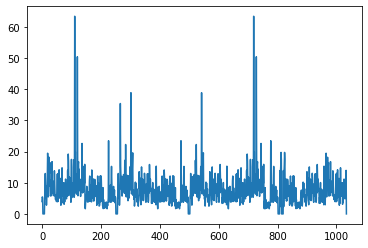

In [ ]:
df = pd.read_csv('diabetes-dataset.csv').drop(columns = "Pregnancies", axis = 1).dropna()
df = df.loc[~((df['Glucose'] == 0) | (df['BloodPressure'] == 0) |
(df['SkinThickness'] == 0) | (df['Insulin'] == 0) | (df['BMI'] == 0))]
anomaly_detector = NearestNeighbors(n_neighbors = 5)
anomaly_detector.fit(df.drop(columns = "Outcome", axis = 1))
distances, indexes = anomaly_detector.kneighbors(df.drop(columns = "Outcome", axis = 1))
plt.plot(distances.mean(axis = 1))
df = df[~df.index.isin(np.where(distances.mean(axis = 1) > 15) [0])].reset_index(drop=True)
scaler = StandardScaler()
x = scaler.fit_transform(df.drop(columns = "Outcome", axis = 1))
y = df.Outcome
df


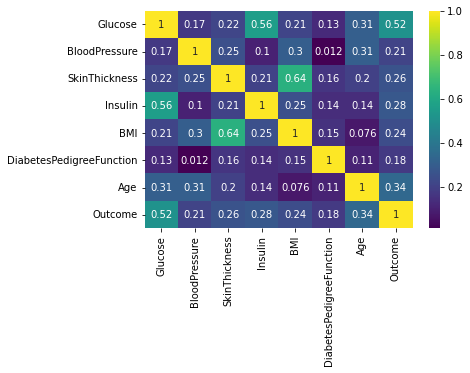

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [ ]:
def error_percent(y_test, y_pred):
  errors = 0
  for i in range(0, len(y_test)):
       errors += abs(y_test.iloc[i] - y_pred[i])
  return 1 - errors / len(y_test)
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.20)
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(15, 15),
max_iter = 1000).fit(x_train, y_train)
y_pred = mlp.predict(np.array(x_test))
print("Errors percentage:", error_percent(y_test, y_pred))
print(pd.DataFrame({ "Real values": y_test, "Predicted values": y_pred
}))
confusion_matrix(y_test, y_pred)

Errors percentage: 0.835820895522388
     Real values  Predicted values
918            0                 0
924            1                 1
889            0                 0
863            0                 0
556            0                 0
..           ...               ...
397            0                 0
647            1                 1
845            0                 0
49             1                 1
97             1                 1

[201 rows x 2 columns]


array([[128,  10],
       [ 23,  40]])

In [ ]:
mlp_20_20 = MLPClassifier(solver='sgd', hidden_layer_sizes=(20, 20),
max_iter = 1000).fit(x_train, y_train)
mlp_30_30 = MLPClassifier(solver='sgd', hidden_layer_sizes=(30, 30),
max_iter = 1000).fit(x_train, y_train)
mlp_40_40 = MLPClassifier(solver='sgd', hidden_layer_sizes=(40, 40),
max_iter = 1000).fit(x_train, y_train)
mlp_50_50 = MLPClassifier(solver='sgd', hidden_layer_sizes=(50, 50),
max_iter = 1000).fit(x_train, y_train)
mlp_100_100 = MLPClassifier(solver='sgd', hidden_layer_sizes=(100,
100), max_iter = 1000).fit(x_train, y_train)
mlp_200_200 = MLPClassifier(solver='sgd', hidden_layer_sizes=(200,
200), max_iter = 1000).fit(x_train, y_train)
print("Errors percentage (20, 20):", error_percent(y_test,
mlp_20_20.predict(np.array(x_test))))
print("Errors percentage (30, 30):", error_percent(y_test,
mlp_30_30.predict(np.array(x_test))))
print("Errors percentage (40, 40):", error_percent(y_test,
mlp_40_40.predict(np.array(x_test))))
print("Errors percentage (50, 50):", error_percent(y_test,
mlp_50_50.predict(np.array(x_test))))
print("Errors percentage (100, 100):", error_percent(y_test,
mlp_100_100.predict(np.array(x_test))))
print("Errors percentage (200, 200):", error_percent(y_test,
mlp_200_200.predict(np.array(x_test))))

Errors percentage (20, 20): 0.8258706467661692
Errors percentage (30, 30): 0.8258706467661692
Errors percentage (40, 40): 0.8159203980099503
Errors percentage (50, 50): 0.835820895522388
Errors percentage (100, 100): 0.8557213930348259
Errors percentage (200, 200): 0.8308457711442786
